First, establish a baseline with all of the features and a simple model:

In [2]:
import pandas as pd

train = pd.read_csv('../data/train_with_binary_score.csv')
train['date'] = pd.to_datetime(train['date'])

test = pd.read_csv('../data/test_with_binary_score.csv')
test['date'] = pd.to_datetime(test['date'])

In [4]:
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1
1,1001,2000-01-11,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,...,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,1
2,1001,2000-01-18,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,...,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,1
3,1001,2000-01-25,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,...,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,1
4,1001,2000-02-01,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,...,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1


In [5]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(train.drop(['score'], axis=1), train['score'])

Learning rate set to 0.30338
0:	learn: 0.6568028	total: 407ms	remaining: 6m 46s
1:	learn: 0.6365401	total: 737ms	remaining: 6m 7s
2:	learn: 0.6231257	total: 1.07s	remaining: 5m 57s
3:	learn: 0.6158827	total: 1.46s	remaining: 6m 3s
4:	learn: 0.6095227	total: 1.82s	remaining: 6m 3s
5:	learn: 0.6000011	total: 2.18s	remaining: 6m 1s
6:	learn: 0.5941700	total: 2.52s	remaining: 5m 58s
7:	learn: 0.5891354	total: 2.9s	remaining: 5m 59s
8:	learn: 0.5834336	total: 3.21s	remaining: 5m 53s
9:	learn: 0.5798978	total: 3.54s	remaining: 5m 50s
10:	learn: 0.5752811	total: 3.85s	remaining: 5m 46s
11:	learn: 0.5720777	total: 4.2s	remaining: 5m 46s
12:	learn: 0.5696027	total: 4.53s	remaining: 5m 44s
13:	learn: 0.5657792	total: 4.93s	remaining: 5m 47s
14:	learn: 0.5619924	total: 5.28s	remaining: 5m 46s
15:	learn: 0.5593459	total: 5.67s	remaining: 5m 48s
16:	learn: 0.5566504	total: 6.05s	remaining: 5m 49s
17:	learn: 0.5547727	total: 6.37s	remaining: 5m 47s
18:	learn: 0.5524107	total: 6.71s	remaining: 5m 46s

In [6]:
testpreds = model.predict(test.drop(['score'], axis=1))

F1 score: 
0.3861808144294326
Precision score: 
0.26304850735951485
Recall score: 
0.7260366319002798


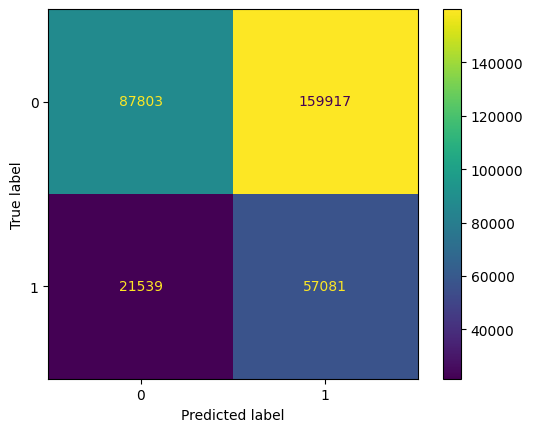

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

print("F1 score: ")
print(f1_score(test['score'], testpreds))
print("Precision score: ")
print(precision_score(test['score'], testpreds))
print("Recall score: ")
print(recall_score(test['score'], testpreds))

cm = confusion_matrix(test['score'], testpreds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1']).plot()
plt.show()

We can see that the F1 score metric is still worse than our base classifier that simply worked on the rounded scores. 